In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
import statsmodels.api as sm
from sklearn import linear_model
from scipy.stats import pearsonr
from matplotlib.pyplot import figure

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df_data = pd.read_csv('https://raw.githubusercontent.com/j-chu33/Senior-Project-Winter-2023/main/Raw-Data/CountryFactors.csv')

df_data.head(10)

,Country Name,Country Code,Time,Time Code,GDP (current US$) [NY.GDP.MKTP.CD],GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS],Access to electricity (% of population) [EG.ELC.ACCS.ZS]
0,Afghanistan,AFG,1997.0,YR1997,NaN,NaN,0.061837,41.432601,NaN
1,Afghanistan,AFG,1998.0,YR1998,NaN,NaN,0.056237,44.094337,NaN
2,Afghanistan,AFG,1999.0,YR1999,NaN,NaN,0.042050,52.185774,NaN
3,Afghanistan,AFG,2000.0,YR2000,NaN,NaN,0.038889,44.990000,1.613591
4,Afghanistan,AFG,2001.0,YR2001,NaN,NaN,0.037077,45.600000,4.074574
5,Afghanistan,AFG,2002.0,YR2002,3.854235e+09,359.766343,0.049047,37.830000,9.409158
6,Afghanistan,AFG,2003.0,YR2003,4.539501e+09,363.101481,0.053875,36.660000,14.738506
7,Afghanistan,AFG,2004.0,YR2004,5.220824e+09,354.033913,0.043730,44.240000,20.064968
8,Afghanistan,AFG,2005.0,YR2005,6.226199e+09,379.955829,0.063495,33.880000,25.390894
9,Afghanistan,AFG,2006.0,YR2006,6.971379e+09,384.078305,0.069174,31.890000,30.718691


In [4]:
df_data.shape

(4996, 9)

In [5]:
# # Read in the country data as a raw github data file
# df_data = pd.read_csv("https://raw.githubusercontent.com/j-chu33/Senior-Project-Winter-2023/main/country_time_gdp_co2.csv")

# # Print sample data
# df_data.head(10)

In [6]:
#Change the names of the columns to be more readible and understandable
df_data = df_data.rename(columns = {'Time':'Year',
                                    'GDP (current US$) [NY.GDP.MKTP.CD]':'GDP',
                                    'GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD]' : 'GDPPC',
                                    'CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]':'CO2_Emissions',
                                    'Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]' : 'Renewable',
                                    'Access to electricity (% of population) [EG.ELC.ACCS.ZS]' : 'Electricity'})

# Convert data to float to allow for mathematical analysis
df_data['Year'] = df_data['Year'].astype('Int64')
df_data['GDP'] = df_data['GDP'].replace('NaN', np.nan)
df_data['GDP'] = df_data['GDP'].astype('float')
df_data['CO2_Emissions'] = df_data['CO2_Emissions'].replace('NaN', np.nan)
df_data['CO2_Emissions'] = df_data['CO2_Emissions'].astype('float')

# View the converted data
df_data.head(25)

,Country Name,Country Code,Year,Time Code,GDP,GDPPC,CO2_Emissions,Renewable,Electricity
0,Afghanistan,AFG,1997,YR1997,NaN,NaN,0.061837,41.432601,NaN
1,Afghanistan,AFG,1998,YR1998,NaN,NaN,0.056237,44.094337,NaN
2,Afghanistan,AFG,1999,YR1999,NaN,NaN,0.042050,52.185774,NaN
3,Afghanistan,AFG,2000,YR2000,NaN,NaN,0.038889,44.990000,1.613591
4,Afghanistan,AFG,2001,YR2001,NaN,NaN,0.037077,45.600000,4.074574
5,Afghanistan,AFG,2002,YR2002,3.854235e+09,359.766343,0.049047,37.830000,9.409158
6,Afghanistan,AFG,2003,YR2003,4.539501e+09,363.101481,0.053875,36.660000,14.738506
7,Afghanistan,AFG,2004,YR2004,5.220824e+09,354.033913,0.043730,44.240000,20.064968
8,Afghanistan,AFG,2005,YR2005,6.226199e+09,379.955829,0.063495,33.880000,25.390894
9,Afghanistan,AFG,2006,YR2006,6.971379e+09,384.078305,0.069174,31.890000,30.718691


In [7]:
# Quick demographic calculations
df_data['Country Code'].nunique()

217

There are 217 countries included in this data set. However not all countries have data for the years between 1997 and 2021, so they will be removed.

In [8]:
# No countries have CO2_Emissions data in 2020 or 2021, so those years will be removed from the analysis
df_data = df_data[(df_data.Year != 2020) & (df_data.Year != 2021)]

In [9]:
# Read in Human Development Index as of 2019
df_hdi = pd.read_csv('https://raw.githubusercontent.com/j-chu33/Senior-Project-Winter-2023/main/Raw-Data/HDI%202019%20Final.csv')
df_hdi = df_hdi.iloc[:, [0, 1, 2]]
df_hdi = df_hdi.rename(columns = {'Country' : 'Country Name',
                                  'Human Development Index (HDI) ':'HDI'})
df_hdi.head()

,Country Name,Country Code,HDI
0,Afghanistan,AFG,0.488
1,Albania,ALB,0.810
2,Algeria,DZA,0.748
3,Andorra,AND,0.873
4,Angola,AGO,0.595


In [10]:
# Combine the GDP and CO2 dataset with HDI dataset
df_gdp_hdi = pd.merge(df_data, df_hdi, how = 'left', on='Country Code')

In [11]:
# Read in GDP Per Capita (in current US$)
# df_gdppc = pd.read_csv('https://raw.githubusercontent.com/j-chu33/Senior-Project-Winter-2023/main/gdppc.csv')
# df_gdppc = df_gdppc.iloc[:, [1, 3, 4]]
# df_gdppc = df_gdppc.rename(columns = {'GDP per capita (current US$) [NY.GDP.PCAP.CD]':'GDPPC'})

# df_gdppc['GDPPC'] = df_gdppc['GDPPC'].replace('NaN', np.nan)
# df_gdppc['GDPPC'] = df_gdppc['GDPPC'].astype('float')

# df_gdppc.head(30)

In [12]:
df_hdi.head()

,Country Name,Country Code,HDI
0,Afghanistan,AFG,0.488
1,Albania,ALB,0.810
2,Algeria,DZA,0.748
3,Andorra,AND,0.873
4,Angola,AGO,0.595


In [13]:
# Combine all 2 datasets
df_combined = pd.merge(df_data, df_hdi, how = 'left', on=['Country Name', 'Country Code'])
df_combined.head(30)

,Country Name,Country Code,Year,Time Code,GDP,GDPPC,CO2_Emissions,Renewable,Electricity,HDI
0,Afghanistan,AFG,1997,YR1997,NaN,NaN,0.061837,41.432601,NaN,0.488
1,Afghanistan,AFG,1998,YR1998,NaN,NaN,0.056237,44.094337,NaN,0.488
2,Afghanistan,AFG,1999,YR1999,NaN,NaN,0.042050,52.185774,NaN,0.488
3,Afghanistan,AFG,2000,YR2000,NaN,NaN,0.038889,44.990000,1.613591,0.488
4,Afghanistan,AFG,2001,YR2001,NaN,NaN,0.037077,45.600000,4.074574,0.488
5,Afghanistan,AFG,2002,YR2002,3.854235e+09,359.766343,0.049047,37.830000,9.409158,0.488
6,Afghanistan,AFG,2003,YR2003,4.539501e+09,363.101481,0.053875,36.660000,14.738506,0.488
7,Afghanistan,AFG,2004,YR2004,5.220824e+09,354.033913,0.043730,44.240000,20.064968,0.488
8,Afghanistan,AFG,2005,YR2005,6.226199e+09,379.955829,0.063495,33.880000,25.390894,0.488
9,Afghanistan,AFG,2006,YR2006,6.971379e+09,384.078305,0.069174,31.890000,30.718691,0.488


In [14]:
df_combined = df_combined[df_combined['HDI'].notna()]

In [15]:
# Not all countries have GDP or CO2 data for the years between 1997 to 2019. Drop countries that do not have any data over the years 1997 to 2019.
null_countries = pd.DataFrame(df_combined[(df_combined['GDPPC'].isna()) | (df_combined['CO2_Emissions'].isna())].groupby('Country Code').size())
null_countries.columns = ['na_counts']

null_countries = null_countries[null_countries.na_counts == 23]

drop_cnt = list(null_countries.index.values)

df_analysis = df_combined[~df_combined['Country Code'].isin(drop_cnt)]
df_analysis['Country Code'].nunique()

167

In [16]:
df_analysis.shape

(3841, 10)

After removing countries that do not have any data over the 22 years, we are left with 189 countries. 

In [17]:
# Dataset to be used for analysis, graphs, and tables
df_analysis.head()

,Country Name,Country Code,Year,Time Code,GDP,GDPPC,CO2_Emissions,Renewable,Electricity,HDI
0,Afghanistan,AFG,1997,YR1997,NaN,NaN,0.061837,41.432601,NaN,0.488
1,Afghanistan,AFG,1998,YR1998,NaN,NaN,0.056237,44.094337,NaN,0.488
2,Afghanistan,AFG,1999,YR1999,NaN,NaN,0.042050,52.185774,NaN,0.488
3,Afghanistan,AFG,2000,YR2000,NaN,NaN,0.038889,44.990000,1.613591,0.488
4,Afghanistan,AFG,2001,YR2001,NaN,NaN,0.037077,45.600000,4.074574,0.488


In [18]:
# Create new categorical variable to determine if country is Developed or Developing. HDI of greater than 0.55 is developed, HDI of less than or equal to 0.55 is developing.
conditions = [
    (df_analysis['HDI'] > 0.55),
    (df_analysis['HDI'] <= 0.55)
]

values = ['Developed', 'Developing']

df_analysis['Category'] = np.select(conditions, values)

df_analysis['Log_GDP'] = np.log(df_analysis['GDP'])
df_analysis['Log_GDPPC'] = np.log(df_analysis['GDPPC'])

In [19]:
# Print out the list of countries to a csv
vals = df_analysis[['Country Name', 'Country Code']]
vals = vals.drop_duplicates()
vals.to_csv('countries.csv', index = False)

df_analysis.to_csv('analysis.csv', index = False)

Text(0, 0.5, 'CO2_Emissions (Metric tons per Capita)')

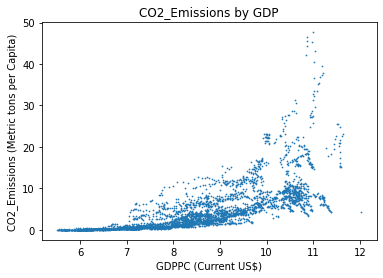

In [20]:
# Graph a scatterplot of GDP and CO2
plt.scatter(df_analysis['Log_GDPPC'], df_analysis['CO2_Emissions'], s = 0.5)
plt.title('CO2_Emissions by GDP')
plt.xlabel('GDPPC (Current US$)')
plt.ylabel('CO2_Emissions (Metric tons per Capita)')

In [21]:
# Perform log transformation on GDP
df_analysis['Log(GDP)'] = np.log(df_analysis['GDP'])
df_analysis['Log(GDPPC)'] = np.log(df_analysis['GDPPC'])
df_analysis

,Country Name,Country Code,Year,Time Code,GDP,GDPPC,CO2_Emissions,Renewable,Electricity,HDI,Category,Log_GDP,Log_GDPPC,Log(GDP),Log(GDPPC)
0,Afghanistan,AFG,1997,YR1997,NaN,NaN,0.061837,41.432601,NaN,0.488,Developing,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1998,YR1998,NaN,NaN,0.056237,44.094337,NaN,0.488,Developing,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1999,YR1999,NaN,NaN,0.042050,52.185774,NaN,0.488,Developing,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,2000,YR2000,NaN,NaN,0.038889,44.990000,1.613591,0.488,Developing,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,2001,YR2001,NaN,NaN,0.037077,45.600000,4.074574,0.488,Developing,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,Zimbabwe,ZWE,2015,YR2015,1.996312e+10,1410.329174,0.878139,80.820000,33.700001,0.601,Developed,23.717152,7.251578,23.717152,7.251578
4987,Zimbabwe,ZWE,2016,YR2016,2.054868e+10,1393.717011,0.762487,81.900000,42.561729,0.601,Developed,23.746062,7.239730,23.746062,7.239730
4988,Zimbabwe,ZWE,2017,YR2017,1.758489e+10,1421.240770,0.700965,82.460000,44.178635,0.601,Developed,23.590306,7.259286,23.590306,7.259286
4989,Zimbabwe,ZWE,2018,YR2018,3.415607e+10,1462.590280,0.822472,80.230000,45.572647,0.601,Developed,24.254206,7.287964,24.254206,7.287964


In [22]:
df_analysis['Country Code'].nunique()

167

In [23]:
# Simple Linear Regression of dataset
df_analysis = df_analysis.dropna()
X = df_analysis['Log(GDPPC)']
y = df_analysis['CO2_Emissions']

X_sm = sm.add_constant(X)

lr = sm.OLS(y, X_sm).fit()

lr.params, lr.summary()

(const        -19.136583
 Log(GDPPC)     2.789406
 dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          CO2_Emissions   R-squared:                       0.497
 Model:                            OLS   Adj. R-squared:                  0.497
 Method:                 Least Squares   F-statistic:                     3550.
 Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
 Time:                        03:41:20   Log-Likelihood:                -10138.
 No. Observations:                3593   AIC:                         2.028e+04
 Df Residuals:                    3591   BIC:                         2.029e+04
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---

* N = 4287
* R^2 = 0.446
* CO2 = -15.213791 + 2.371577 * Log(GDPPC)





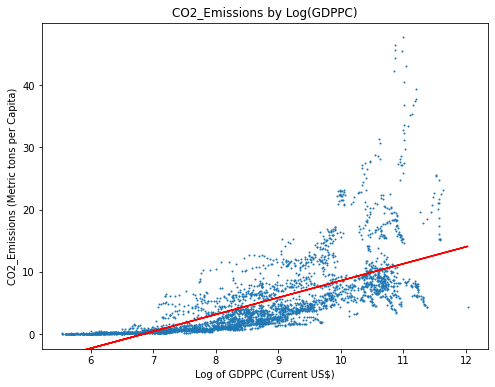

In [24]:
# Graph a scatterplot of Log(GDPPC) and CO2
plt.scatter(df_analysis['Log_GDPPC'], df_analysis['CO2_Emissions'], s= 1)
plt.yticks(np.arange(0, 50, 10))
plt.title('CO2_Emissions by Log(GDPPC)')
plt.xlabel('Log of GDPPC (Current US$)')
plt.ylabel('CO2_Emissions (Metric tons per Capita)')

plt.autoscale(False)
slr = -18.59481 + 2.71679 * df_analysis['Log(GDPPC)']
plt.plot(df_analysis['Log(GDPPC)'], slr,'-r')

plt.gcf().set_size_inches(8, 6)
plt.show()


In [25]:
df_analysis['Country Name'].nunique()

167

In [26]:
df_analysis['Country Code'].nunique()

167

In [27]:
df_analysis['Country Code'].unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS',
       'AUT', 'AZE', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN',
       'BTN', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'CPV',
       'KHM', 'CMR', 'CAN', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM',
       'CRI', 'HRV', 'CUB', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM',
       'ECU', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FJI', 'FIN', 'FRA',
       'GAB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GIN', 'GNB',
       'GUY', 'HTI', 'HND', 'HUN', 'ISL', 'IND', 'IDN', 'IRQ', 'IRL',
       'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'KWT',
       'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MDG',
       'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX',
       'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL', 'NLD',
       'NZL', 'NIC', 'NER', 'NGA', 'MKD', 'NOR', 'OMN', 'PAK', 'PLW',
       'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'QAT', 'ROU',
       'RUS', 'RWA',

In [28]:
# Simple Linear Regression developed countries
df_developed = df_analysis[df_analysis['Category'] == 'Developed']

# df_2019 = df_developed.dropna()
X = df_developed['Log_GDPPC']
y = df_developed['CO2_Emissions']

X_sm = sm.add_constant(X)

lr = sm.OLS(y, X_sm).fit()

lr.params, lr.summary()

(const       -23.307436
 Log_GDPPC     3.232462
 dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          CO2_Emissions   R-squared:                       0.461
 Model:                            OLS   Adj. R-squared:                  0.461
 Method:                 Least Squares   F-statistic:                     2586.
 Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
 Time:                        03:41:21   Log-Likelihood:                -8715.7
 No. Observations:                3024   AIC:                         1.744e+04
 Df Residuals:                    3022   BIC:                         1.745e+04
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 -----

In [29]:
df_analysis[df_analysis['Country Name']=='Ghana']

,Country Name,Country Code,Year,Time Code,GDP,GDPPC,CO2_Emissions,Renewable,Electricity,HDI,Category,Log_GDP,Log_GDPPC,Log(GDP),Log(GDPPC)
1702,Ghana,GHA,1997,YR1997,6.891309e+09,968.856993,0.235384,78.339045,36.603695,0.631,Developed,22.653527,6.876117,22.653527,6.876117
1703,Ghana,GHA,1998,YR1998,7.480969e+09,990.186223,0.325947,73.578071,42.600000,0.631,Developed,22.735628,6.897893,22.735628,6.897893
1704,Ghana,GHA,1999,YR1999,7.719355e+09,1008.845091,0.343123,72.783888,40.740540,0.631,Developed,22.766997,6.916561,22.766997,6.916561
1705,Ghana,GHA,2000,YR2000,4.983024e+09,1020.173739,0.291882,71.620000,43.700001,0.631,Developed,22.329303,6.927728,22.329303,6.927728
1706,Ghana,GHA,2001,YR2001,5.314910e+09,1033.133041,0.307493,69.320000,44.837513,0.631,Developed,22.393782,6.940351,22.393782,6.940351
1707,Ghana,GHA,2002,YR2002,6.166330e+09,1050.355895,0.357929,65.680000,46.858070,0.631,Developed,22.542370,6.956884,22.542370,6.956884
1708,Ghana,GHA,2003,YR2003,7.632407e+09,1075.384037,0.334747,64.470000,48.299999,0.631,Developed,22.755669,6.980433,22.755669,6.980433
1709,Ghana,GHA,2004,YR2004,8.881369e+09,1105.698138,0.304933,62.380000,50.885830,0.631,Developed,22.907221,7.008232,22.907221,7.008232
1710,Ghana,GHA,2005,YR2005,1.074468e+10,1140.199319,0.312931,61.430000,41.250000,0.631,Developed,23.097676,7.038958,23.097676,7.038958
1711,Ghana,GHA,2006,YR2006,2.044089e+10,1181.572340,0.368421,58.560000,55.093449,0.631,Developed,23.740803,7.074601,23.740803,7.074601


In [30]:
df_developed['Country Code'].nunique()

138

In [31]:
df_developed['Country Name'].unique()

array(['Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Comoros',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Dominica', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guyana', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica',
       'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait',
       'Latvia', 'Lebanon', 'Libya', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Mala

In [32]:
# Simple Linear Regression developing countries
df_developing = df_analysis[df_analysis['Category'] == 'Developing']

X = df_developing['Log(GDPPC)']
y = df_developing['CO2_Emissions']

X_sm = sm.add_constant(X)

lr = sm.OLS(y, X_sm).fit()

lr.params, lr.summary()

(const        -1.501800
 Log(GDPPC)    0.264259
 dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          CO2_Emissions   R-squared:                       0.564
 Model:                            OLS   Adj. R-squared:                  0.563
 Method:                 Least Squares   F-statistic:                     734.1
 Date:                Thu, 09 Mar 2023   Prob (F-statistic):          2.41e-104
 Time:                        03:41:21   Log-Likelihood:                 358.48
 No. Observations:                 569   AIC:                            -713.0
 Df Residuals:                     567   BIC:                            -704.3
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 -----

In [33]:
df_developing['Country Name'].unique()

array(['Afghanistan', 'Benin', 'Burkina Faso', 'Burundi',
       'Central African Republic', 'Chad', 'Djibouti', 'Eritrea',
       'Ethiopia', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mozambique', 'Niger',
       'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone',
       'Somalia', 'South Sudan', 'Sudan', 'Togo', 'Uganda'], dtype=object)

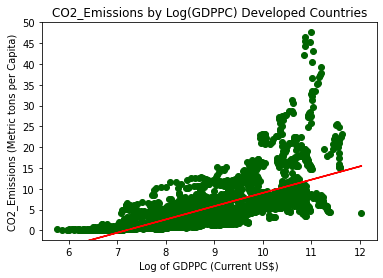

In [34]:
# Plot of developed over all years
plt.scatter(df_developed['Log_GDPPC'], df_developed['CO2_Emissions'], c='darkgreen')
plt.yticks(np.arange(0, 55, 5))
plt.title('CO2_Emissions by Log(GDPPC) Developed Countries')
plt.xlabel('Log of GDPPC (Current US$)')
plt.ylabel('CO2_Emissions (Metric tons per Capita)')

plt.autoscale(False)
slr = -22.94196 + 3.19350 * df_developed['Log(GDPPC)']
plt.plot(df_developed['Log(GDPPC)'], slr,'-r')

In [35]:
df_developing['Country Code'].nunique()

29

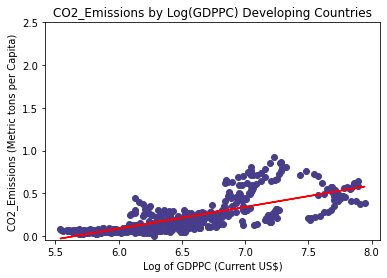

In [36]:
# Plot of developing countries over all years

plt.scatter(df_developing['Log_GDPPC'], df_developing['CO2_Emissions'], c='darkslateblue')
plt.yticks(np.arange(0, 3, 0.5))
plt.title('CO2_Emissions by Log(GDPPC) Developing Countries')
plt.xlabel('Log of GDPPC (Current US$)')
plt.ylabel('CO2_Emissions (Metric tons per Capita)')

plt.autoscale(False)
slr = -1.432840 + 0.253222 * df_developing['Log(GDPPC)']
plt.plot(df_developing['Log(GDPPC)'], slr,'-r')

In [37]:
# Simple Linear Regression of 2019 data
df_2019 = df_analysis[df_analysis.Year == 2019]

df_2019 = df_2019.dropna()
X = df_2019['Log_GDPPC']
y = df_2019['CO2_Emissions']

X_sm = sm.add_constant(X)

lr = sm.OLS(y, X_sm).fit()

lr.params, lr.summary()

(const       -16.440248
 Log_GDPPC     2.385203
 dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          CO2_Emissions   R-squared:                       0.452
 Model:                            OLS   Adj. R-squared:                  0.449
 Method:                 Least Squares   F-statistic:                     133.6
 Date:                Thu, 09 Mar 2023   Prob (F-statistic):           6.48e-23
 Time:                        03:41:22   Log-Likelihood:                -446.38
 No. Observations:                 164   AIC:                             896.8
 Df Residuals:                     162   BIC:                             903.0
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 -----



* N = 186
* R^2 = 0.447
* CO2 = -15.514737 + 2.260167 * Log(GDPPC)



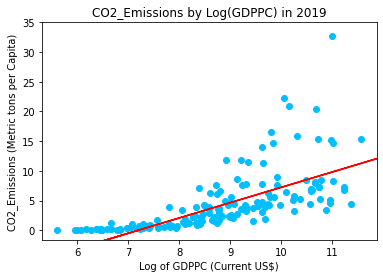

In [38]:
# Graph a scatterplot of Log(GDPPC) and CO2 for 2019
df_2019 = df_analysis[df_analysis.Year == 2019]

plt.scatter(df_2019['Log(GDPPC)'], df_2019['CO2_Emissions'], c='deepskyblue')
plt.yticks(np.arange(0, 40, 5))
plt.title('CO2_Emissions by Log(GDPPC) in 2019')
plt.xlabel('Log of GDPPC (Current US$)')
plt.ylabel('CO2_Emissions (Metric tons per Capita)')

plt.autoscale(False)
slr = -18.492927 + 2.572615 * df_analysis['Log(GDPPC)']
plt.plot(df_analysis['Log(GDPPC)'], slr,'-r')

Text(0, 0.5, 'CO2_Emissions (Metric tons per Capita)')

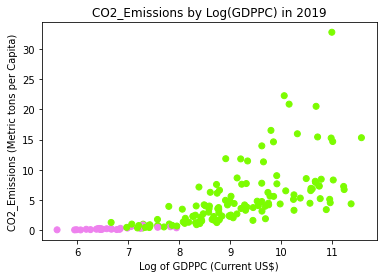

In [39]:
# Graph of scatterplot of Log(GDP) and CO2 for 2019 between Developed and Developing Countries
df_2019 = df_analysis[df_analysis.Year == 2019]

colors = {'Developed':'lawngreen', 'Developing':'violet'}

plt.scatter(df_2019['Log(GDPPC)'], df_2019['CO2_Emissions'], c=df_2019['Category'].map(colors))
plt.title('CO2_Emissions by Log(GDPPC) in 2019')
plt.xlabel('Log of GDPPC (Current US$)')
plt.ylabel('CO2_Emissions (Metric tons per Capita)')

[Text(0.5, 1.0, 'CO2_Emissions by Log(GDPPC) in 2019')]

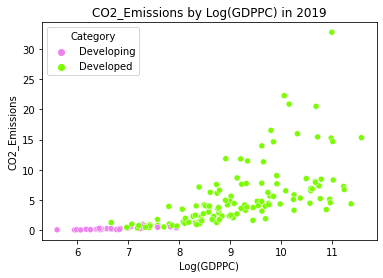

In [40]:
colors = {'Developed':'lawngreen', 'Developing':'violet'}

sns.scatterplot(x='Log(GDPPC)', y='CO2_Emissions', data=df_2019, hue="Category", palette = colors).set(title='CO2_Emissions by Log(GDPPC) in 2019')

In [41]:
# See the number of developed vs developing countries in the dataset in 2019
df_2019.groupby('Category')['Country Code'].size()

Category
Developed     137
Developing     27
Name: Country Code, dtype: int64

In [42]:
# Simple Linear Regression of Developing countries in 2019
df_2019_developing = df_analysis[(df_analysis.Year == 2019) & (df_analysis.Category == 'Developing')]

df_2019_developing = df_2019_developing.dropna()

X = df_2019_developing['Log(GDPPC)']
y = df_2019_developing['CO2_Emissions']

X_sm = sm.add_constant(X)

lr = sm.OLS(y, X_sm).fit()

lr.params, lr.summary()

(const        -1.567683
 Log(GDPPC)    0.274549
 dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          CO2_Emissions   R-squared:                       0.575
 Model:                            OLS   Adj. R-squared:                  0.558
 Method:                 Least Squares   F-statistic:                     33.87
 Date:                Thu, 09 Mar 2023   Prob (F-statistic):           4.55e-06
 Time:                        03:41:24   Log-Likelihood:                 16.361
 No. Observations:                  27   AIC:                            -28.72
 Df Residuals:                      25   BIC:                            -26.13
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 -----

* N = 31
* R^2 = 0.508
* CO2 = -1.480742 + 0.260212 * Log(GDPPC)

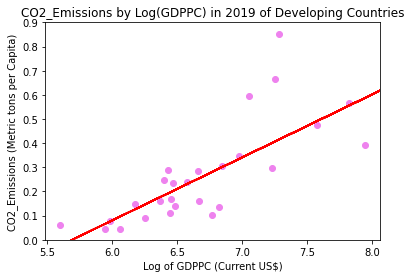

In [43]:
# Scatterplot of developing countries
plt.scatter(df_2019_developing['Log(GDPPC)'], df_2019_developing['CO2_Emissions'], c='violet')
plt.yticks(np.arange(0, 1, .1))
plt.title('CO2_Emissions by Log(GDPPC) in 2019 of Developing Countries')
plt.xlabel('Log of GDPPC (Current US$)')
plt.ylabel('CO2_Emissions (Metric tons per Capita)')

plt.autoscale(False)
slr = -1.480742 + 0.260212 * df_analysis['Log(GDPPC)']
plt.plot(df_analysis['Log(GDPPC)'], slr,'-r')

In [44]:
# Simple Linear Regression of Developed countries in 2019
df_2019_develop = df_analysis[(df_analysis.Year == 2019) & (df_analysis.Category == 'Developed')]

df_2019_develop = df_2019_develop.dropna()

X = df_2019_develop['Log(GDPPC)']
y = df_2019_develop['CO2_Emissions']

X_sm = sm.add_constant(X)

lr = sm.OLS(y, X_sm).fit()

lr.params, lr.summary()

(const        -19.961918
 Log(GDPPC)     2.755674
 dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          CO2_Emissions   R-squared:                       0.392
 Model:                            OLS   Adj. R-squared:                  0.388
 Method:                 Least Squares   F-statistic:                     87.15
 Date:                Thu, 09 Mar 2023   Prob (F-statistic):           2.71e-16
 Time:                        03:41:25   Log-Likelihood:                -382.65
 No. Observations:                 137   AIC:                             769.3
 Df Residuals:                     135   BIC:                             775.1
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---

* N = 155
* R^2 = 0.379
* CO2 = -18.492927 + 2.572615 * Log(GDPPC)

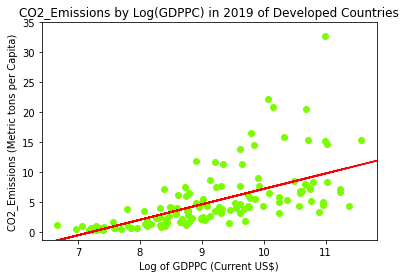

In [45]:
# Scatterplot of developing countries
plt.scatter(df_2019_develop['Log(GDPPC)'], df_2019_develop['CO2_Emissions'], c='lawngreen')
plt.yticks(np.arange(0, 40, 5))
plt.title('CO2_Emissions by Log(GDPPC) in 2019 of Developed Countries')
plt.xlabel('Log of GDPPC (Current US$)')
plt.ylabel('CO2_Emissions (Metric tons per Capita)')

plt.autoscale(False)
slr = -18.492927 + 2.572615 * df_analysis['Log(GDPPC)']
plt.plot(df_analysis['Log(GDPPC)'], slr,'-r')

In [46]:
# Create multi regression model with Developed and Developing Dummies
df_cat = pd.get_dummies(df_analysis['Category'])
df_multi = df_analysis.join(df_cat)

X = df_multi[['Log(GDPPC)', 'Renewable', 'Electricity', 'Developed', 'Developing']]
y = df_multi['CO2_Emissions']

X_sm = sm.add_constant(X)

lr = sm.OLS(y, X_sm).fit()

lr.params, lr.summary()

(const         -9.430858
 Log(GDPPC)     2.946073
 Renewable     -0.065332
 Electricity   -0.042846
 Developed     -5.916087
 Developing    -3.514771
 dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          CO2_Emissions   R-squared:                       0.551
 Model:                            OLS   Adj. R-squared:                  0.551
 Method:                 Least Squares   F-statistic:                     1102.
 Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
 Time:                        03:41:25   Log-Likelihood:                -9933.7
 No. Observations:                3593   AIC:                         1.988e+04
 Df Residuals:                    3588   BIC:                         1.991e+04
 Df Model:                           4                                         
 Covariance Type:            nonrobust                          

In [47]:
# Create multi regression model of 2019
df_multi_2019 = df_multi[df_multi.Year == 2019]

X = df_multi_2019[['Log(GDPPC)', 'Developed', 'Developing']]
y = df_multi_2019['CO2_Emissions']

X_sm = sm.add_constant(X)

lr = sm.OLS(y, X_sm).fit()

lr.params, lr.summary()

(const        -12.126503
 Log(GDPPC)     2.645444
 Developed     -6.832110
 Developing    -5.294393
 dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          CO2_Emissions   R-squared:                       0.460
 Model:                            OLS   Adj. R-squared:                  0.453
 Method:                 Least Squares   F-statistic:                     68.49
 Date:                Thu, 09 Mar 2023   Prob (F-statistic):           2.99e-22
 Time:                        03:41:25   Log-Likelihood:                -445.21
 No. Observations:                 164   AIC:                             896.4
 Df Residuals:                     161   BIC:                             905.7
 Df Model:                           2                                         
 Covariance Type:            nonrobust                                         
                  coef    std err 

In [48]:
# Summary Stats of Variables
df_analysis['Log(GDPPC)'].describe()

count    3593.000000
mean        8.534289
std         1.449535
min         5.538288
25%         7.366482
50%         8.502492
75%         9.662492
max        12.030564
Name: Log(GDPPC), dtype: float64

In [49]:
df_analysis['CO2_Emissions'].describe()

count    3593.000000
mean        4.669012
std         5.734671
min         0.000965
25%         0.669683
50%         2.670728
75%         6.755278
max        47.651306
Name: CO2_Emissions, dtype: float64

In [50]:
df_analysis['HDI'].describe()

count    3593.000000
mean        0.735140
std         0.150513
min         0.361000
25%         0.614000
50%         0.760000
75%         0.859000
max         0.962000
Name: HDI, dtype: float64

In [51]:
df_multi['Developed'].describe()

count    3593.000000
mean        0.841637
std         0.365132
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Developed, dtype: float64

In [52]:
df_multi['Developing'].describe()

count    3593.000000
mean        0.158363
std         0.365132
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Developing, dtype: float64

In [53]:
# Test for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_multi[['Log(GDPPC)', 'Developed', 'Developing']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

      feature        VIF
0  Log(GDPPC)   1.573274
1   Developed  51.086125
2  Developing   6.038161


In [54]:
# Test for Homoskedasticity
df_multi_2019 = df_multi[df_multi.Year == 2019]

X = df_multi_2019[['Log(GDPPC)', 'Developed', 'Developing']]
y = df_multi_2019['CO2_Emissions']


X_sm = sm.add_constant(X)

lr = sm.OLS(y, X_sm).fit()

lr.fittedvalues

x = list(range(1,187))